## Observations and Insights 

In [ ]:
# Data Observations:
# 1. In general, Capomulin and Ramicane generate significantly smaller tumors upon treatment than do Infubinol and Ceftamin.
# This should lead to a focus of further study on Capomulin and Ramicane as possibly superior treatments. 

# 2. Overall, Capomulin and Ramicane generate the smallest average tumors, as evidenced by their means. However, this could be limited by the fact that 
# mice treated with Capomulin and Ramicane had the most treatment timepoints in the study.

# 3. The average tumor volume of mice being treated with Capomulin is positively correlated 
# with the weight of the mouse. As the weight of a mouse rises, so too does the average tumor volume. 

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")
combined_df
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [102]:
# Checking the number of mice.
count_of_mice = combined_df["Mouse ID"].count()
count_of_mice

1893

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse = combined_df[combined_df.duplicated(['Mouse ID',])]
all_duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates(['Mouse ID','Timepoint'], keep = 'first')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# Checking the number of mice in the clean DataFrame.
count_of_mice_2 = clean_df['Mouse ID'].count()
count_of_mice_2

1888

## Summary Statistics

In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

statistics_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": std_dev, "SEM": sem})
statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [20]:
timepoint_pandas = pd.DataFrame(clean_df.groupby(["Drug Regimen"]).count()).reset_index()
timepoint_pandas_2 = timepoint_pandas[["Drug Regimen", "Timepoint"]]
timepoint_pandas_2 = timepoint_pandas_2.set_index("Drug Regimen")
timepoint_pandas_2

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


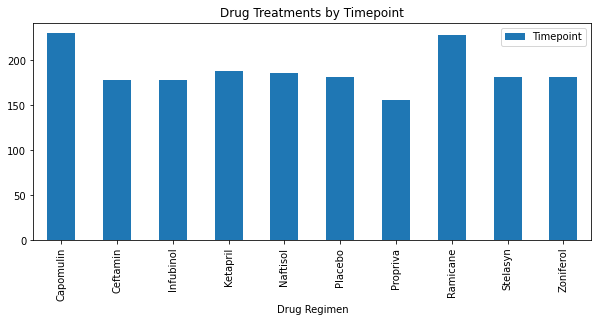

In [21]:
timepoint_pandas_2.plot(kind = "bar", figsize = (10,4))
plt.title("Drug Treatments by Timepoint")
plt.tight_layout
plt.show;

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
treatment_list = statistics_df.index.tolist()
treatment_list

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [23]:
count_list = timepoint_pandas_2['Timepoint'].tolist()
count_list

[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]

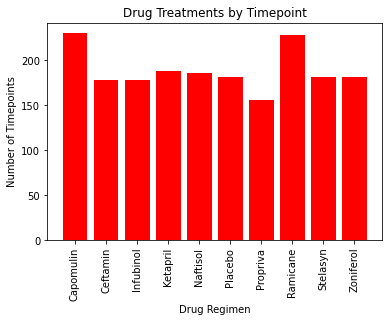

In [95]:
x_axis = np.arange(len(treatment_list))
x_axis = treatment_list
plt.bar(x_axis, count_list, color = 'r', alpha = 1.0, align = 'center')
plt.xticks(rotation = 90)
plt.title("Drug Treatments by Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show;

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_pandas = pd.DataFrame(clean_df.groupby(['Sex']).count()).reset_index()
gender_pandas


,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,930,930,930,930,930,930,930
1,Male,958,958,958,958,958,958,958


In [25]:
gender_pandas_2 = gender_pandas[["Sex", "Mouse ID"]]
gender_pandas_2 = gender_pandas_2.set_index("Sex")
gender_pandas_2

,Mouse ID
Sex,
Female,930
Male,958


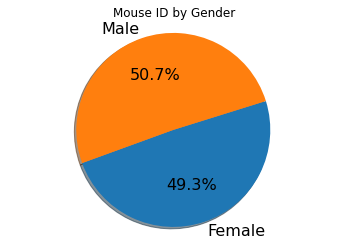

In [26]:
gender_pandas_2.plot(kind = "pie", subplots = True, autopct = '%1.1f%%', startangle = 200, shadow = True, 
                      legend = False, fontsize = 16)
plt.title("Mouse ID by Gender")
plt.ylabel("")
plt.axis("equal")
plt.show;

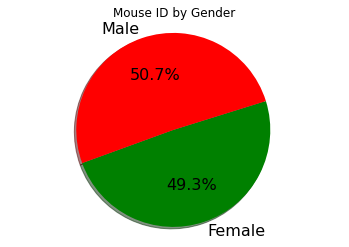

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot_count = [930, 958]
labels = ["Female", "Male"]
colors = ['Green', 'Red']
plt.pie(gender_pyplot_count, labels=labels, colors=colors, autopct = '%1.1f%%', shadow = True, 
        textprops = {'fontsize': 16},startangle = 200)
plt.title("Mouse ID by Gender")
plt.axis("equal")
plt.show;

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

timepoint_list= clean_df.groupby('Mouse ID').max()['Timepoint']
timepoint_df = pd.DataFrame(timepoint_list)
treatment_df = pd.merge(timepoint_df, clean_df, on = ('Mouse ID', 'Timepoint'))
treatment_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [29]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

capo_treat = []
rami_treat = []
infub_treat = []
ceft_treat = []

capo_df = treatment_df.loc[treatment_df['Drug Regimen'] == "Capomulin"]
capo_vol = capo_df["Tumor Volume (mm3)"]

for i in capo_vol:
    capo_treat.append([i + 1])
   
rami_df = treatment_df.loc[treatment_df['Drug Regimen'] == "Ramicane"]
rami_vol = rami_df["Tumor Volume (mm3)"]

for i in rami_vol:
    rami_treat.append([i + 1])
   
infub_df = treatment_df.loc[treatment_df['Drug Regimen'] == "Infubinol"]
infub_vol = infub_df["Tumor Volume (mm3)"]

for i in infub_vol:
    infub_treat.append([i + 1])
  
ceft_df = treatment_df.loc[treatment_df['Drug Regimen'] == "Ceftamin"]
ceft_vol = ceft_df["Tumor Volume (mm3)"]

for i in ceft_vol:
    ceft_treat.append([i + 1])
  

print(capo_treat)

print(rami_treat)

print(infub_treat)

print(ceft_treat)

[[39.98287774], [39.93963263], [31.48598484], [38.07402422], [41.1592203], [48.68596303], [38.31184577], [39.1251644], [39.75326548], [42.48300765], [39.84687569], [29.43096411], [34.32909778], [47.53920617], [33.37735684], [42.58152074], [24.34359787], [41.72857787], [35.45529799], [32.02392294], [41.65812366], [40.95234669], [37.04104736], [29.48403281], [32.8962384]]
[[39.4076183], [44.0475426], [39.81036633], [33.97852192], [39.34200823], [34.39765251], [38.31123552], [41.65900627], [30.12847181], [34.56240217], [37.37451039], [32.56046955], [37.13485243], [23.05012627], [31.56462509], [32.09533505], [46.22086888], [37.56165229], [38.22565033], [44.41938077], [31.27623175], [41.66771292], [44.16637266], [45.18345092], [31.63869575]]
[[68.97341878], [66.52574285], [58.03186187], [67.08306589], [73.2267309], [37.3213458], [61.96971133], [63.43540402], [61.91876652], [68.28962147], [67.19691151], [63.11727887], [48.01036401], [61.16518046], [56.62942846], [46.69933088], [55.65654872],

In [33]:
capo_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
19,b128,45,Capomulin,Female,9,22,38.982878,2
24,b742,45,Capomulin,Male,7,21,38.939633,0
61,f966,20,Capomulin,Male,16,17,30.485985,0
64,g288,45,Capomulin,Male,3,19,37.074024,1
66,g316,45,Capomulin,Female,22,22,40.159220,2
81,i557,45,Capomulin,Female,1,24,47.685963,1
84,i738,45,Capomulin,Female,23,20,37.311846,2
86,j119,45,Capomulin,Female,7,23,38.125164,1
88,j246,35,Capomulin,Female,21,21,38.753265,1
109,l509,45,Capomulin,Male,17,21,41.483008,3


In [44]:
capo_treat

[[39.98287774],
 [39.93963263],
 [31.48598484],
 [38.07402422],
 [41.1592203],
 [48.68596303],
 [38.31184577],
 [39.1251644],
 [39.75326548],
 [42.48300765],
 [39.84687569],
 [29.43096411],
 [34.32909778],
 [47.53920617],
 [33.37735684],
 [42.58152074],
 [24.34359787],
 [41.72857787],
 [35.45529799],
 [32.02392294],
 [41.65812366],
 [40.95234669],
 [37.04104736],
 [29.48403281],
 [32.8962384]]

In [85]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capo_quart = capo_vol.quantile([.25,.5,.75])
capo_lowerq = capo_quart[0.25]
capo_upperq = capo_quart[0.75]
iqr_capo = capo_upperq - capo_lowerq

print(f"The lower quartile of Capomulin is: {capo_lowerq}")
print(f"The upper quartile of Capomulin is: {capo_upperq}")
print(f"The interquartile range of Capomulin is: {iqr_capo}")
print(f"The median of Capomulin is: {capo_quart[0.5]}")

capo_lower_bound = capo_lowerq - (1.5 * iqr_capo)
capo_upper_bound = capo_upperq + (1.5 * iqr_capo)

print(f"Values below {capo_lower_bound} could be outliers.")
print(f"Values above {capo_upper_bound} could be outliers.")
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
# Determine outliers using upper and lower bounds

# outlier_capo = final_tumor_vol_df[(final_tumor_vol_df["Tumor Volume (mm3)"] < capomulin_lower_bound) | 
                                 # (final_tumor_vol_df["Tumor Volume (mm3)"] > capomulin_upper_bound)]

#outlier_capo = (capo_treat < capo_lower_bound) | (capo_treat > capo_upper_bound)
#outlier_capo

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [81]:
rami_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
10,a520,45,Ramicane,Male,13,21,38.810366,1
12,a644,45,Ramicane,Female,7,17,32.978522,1
33,c458,30,Ramicane,Female,23,20,38.342008,2
37,c758,45,Ramicane,Male,9,17,33.397653,1
45,d251,45,Ramicane,Female,8,19,37.311236,2
52,e662,45,Ramicane,Male,8,24,40.659006,2
70,g791,45,Ramicane,Male,11,16,29.128472,1
77,i177,45,Ramicane,Male,10,18,33.562402,3


In [86]:
rami_quart = rami_vol.quantile([.25,.5,.75])
rami_lowerq = rami_quart[0.25]
rami_upperq = rami_quart[0.75]
iqr_rami = rami_upperq - rami_lowerq

print(f"The lower quartile of Ramicane is: {rami_lowerq}")
print(f"The upper quartile of Ramicane is: {rami_upperq}")
print(f"The interquartile range of Ramicane is: {iqr_rami}")
print(f"The median of Ramicane is: {rami_quart[0.5]}")

rami_lower_bound = rami_lowerq - (1.5 * iqr_rami)
rami_upper_bound = rami_upperq + (1.5 * iqr_rami)

print(f"Values below {rami_lower_bound} could be outliers.")
print(f"Values above {rami_upper_bound} could be outliers.")

# outlier_rami = (rami_treat < rami_lower_bound) | (rami_treat > rami_upper_bound)
# outlier_rami

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [82]:
infub_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
11,a577,30,Infubinol,Female,6,25,57.031862,2
13,a685,45,Infubinol,Male,8,30,66.083066,3
27,c139,45,Infubinol,Male,11,28,72.226731,2
31,c326,5,Infubinol,Female,18,25,36.321346,0
41,c895,30,Infubinol,Female,7,29,60.969711,2
50,e476,45,Infubinol,Male,23,26,62.435404,1
56,f345,45,Infubinol,Male,23,26,60.918767,1
79,i386,40,Infubinol,Female,23,29,67.289621,4


In [87]:
infub_quart = infub_vol.quantile([.25,.5,.75])
infub_lowerq = infub_quart[0.25]
infub_upperq = infub_quart[0.75]
iqr_infub = infub_upperq - infub_lowerq

print(f"The lower quartile of Infubinol is: {infub_lowerq}")
print(f"The upper quartile of Infubinol is: {infub_upperq}")
print(f"The interquartile range of Infubinol is: {iqr_infub}")
print(f"The median of Infubinol is: {infub_quart[0.5]}")

infub_lower_bound = infub_lowerq - (1.5 * iqr_infub)
infub_upper_bound = infub_upperq + (1.5 * iqr_infub)

print(f"Values below {infub_lower_bound} could be outliers.")
print(f"Values above {infub_upper_bound} could be outliers.")

# outlier_infub = (infub_treat < infub_lower_bound) | (infub_treat > infub_upper_bound)
# outlier_infub

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [83]:
ceft_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
3,a275,45,Ceftamin,Female,20,28,62.999356,3
21,b447,0,Ceftamin,Male,2,30,45.000000,0
22,b487,25,Ceftamin,Female,6,28,56.057749,1
25,b759,30,Ceftamin,Female,12,25,55.742829,1
58,f436,15,Ceftamin,Female,3,25,48.722078,2
76,h531,5,Ceftamin,Male,5,27,47.784682,0
89,j296,45,Ceftamin,Female,24,30,61.849023,3
95,k210,45,Ceftamin,Male,15,28,68.923185,3
107,l471,45,Ceftamin,Female,7,28,67.748662,1
108,l490,30,Ceftamin,Male,24,26,57.918381,3


In [88]:
ceft_quart = ceft_vol.quantile([.25,.5,.75])
ceft_lowerq = ceft_quart[0.25]
ceft_upperq = ceft_quart[0.75]
iqr_ceft = ceft_upperq - ceft_lowerq

print(f"The lower quartile of Ceftamin is: {ceft_lowerq}")
print(f"The upper quartile of Ceftamin is: {ceft_upperq}")
print(f"The interquartile range of Ceftamin is: {iqr_ceft}")
print(f"The median of Ceftamin is: {ceft_quart[0.5]}")

ceft_lower_bound = ceft_lowerq - (1.5 * iqr_ceft)
ceft_upper_bound = ceft_upperq + (1.5 * iqr_ceft)

print(f"Values below {ceft_lower_bound} could be outliers.")
print(f"Values above {ceft_upper_bound} could be outliers.")

# outlier_ceft = (ceft_treat < ceft_lower_bound) | (ceft_treat > ceft_upper_bound)
# outlier_ceft

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The median of Ceftamin is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


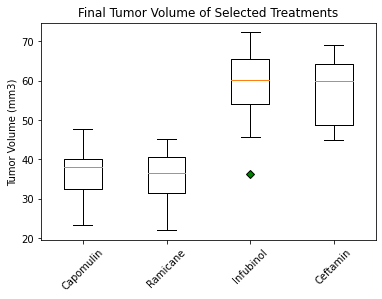

In [126]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volume = [capo_vol, rami_vol, infub_vol, ceft_vol]
fig1, ax1 = plt.subplots()
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.boxplot(tumor_volume, flierprops=green_diamond)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol","Ceftamin"], rotation=45)
ax1.set_title("Final Tumor Volume of Selected Treatments")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.show;

## Line and Scatter Plots

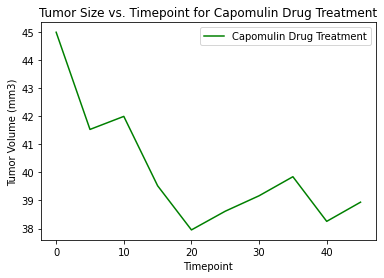

In [93]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capo_single = clean_df.loc[clean_df['Mouse ID'] == "b742"]
single_mouse= capo_single.loc[:,['Timepoint', 'Tumor Volume (mm3)']]
x_axis = single_mouse['Timepoint']
y_axis = single_mouse['Tumor Volume (mm3)']

plt.plot(x_axis, y_axis, color = "green", label = "Capomulin Drug Treatment")
plt.title("Tumor Size vs. Timepoint for Capomulin Drug Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.show()

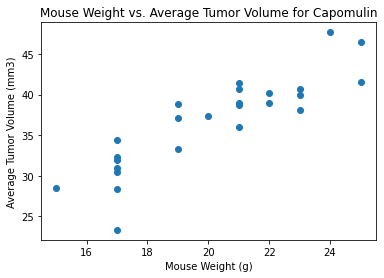

In [105]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_avg = capo_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

plt.scatter(capo_avg["Weight (g)"], capo_avg["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.show;

## Correlation and Regression

In [99]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capo_avg = capo_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().reset_index()

volume = capo_avg["Tumor Volume (mm3)"]
weight = capo_avg["Weight (g)"]

correlation = st.pearsonr(volume, weight)
print(f"Correlation between average tumor volume and mouse weight is {round(correlation[0],2)}")

Correlation between average tumor volume and mouse weight is 0.88


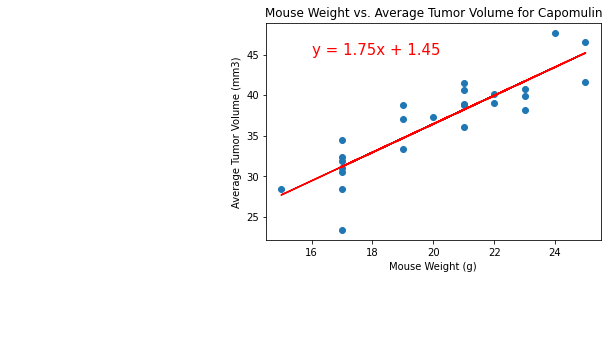

The r-squared value is: 0.7686134812139006


In [132]:
x_values = weight
y_values = volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.text(16, 45, r"y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)), fontsize = 15, color = "Red")
plt.show()
print(f"The r-squared value is: {rvalue**2}")